# Mid-semester assignment Part 1 - Basics of deep learning
---
<br>

### Name and ID:
Student 1: Amos Zohar - 311402812
<br>
Student 2: Gal Havshush - 207389909

## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Download Dataset

In [2]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 492 µs (started: 2024-12-28 19:50:02 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [3]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 121 ms (started: 2024-12-28 19:50:06 +00:00)


## Data preprocessing (10%)

### Feature scaling

In [4]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 5000)
time: 63.1 ms (started: 2024-12-28 19:50:09 +00:00)


### Select two classes

This code filters the dataset to include only samples from the two selected classes (4 and 9) using a boolean mask. The labels are then remapped, with 4 converted to 0 and 9 converted to 1. The print statements at the end are for verification purposes.

In [5]:
# create a mask to filter the dataset
choosen_classes = ["4","9"]
mask = np.isin(y, choosen_classes)

# filter the dataset using the mask
X_filtered = np.array(X1[:, mask.flatten()])
y_filtered = np.array(y1[:, mask.flatten()], dtype=int)

# remap the labels (4 -> 0, 9- > 1)
y_filtered = np.where(y_filtered == 4, 0, 1)

# shape verfication
print("X_filtered shape:", X_filtered.shape)
print("y_filtered shape:", y_filtered.shape)

X_filtered shape: (784, 1000)
y_filtered shape: (1, 1000)
time: 39.1 ms (started: 2024-12-28 19:50:13 +00:00)


### Split the data into Train set and Test set

This code shuffles the dataset, splits it into an 80-20 train-test split and prints the shapes for verification.

In [6]:
# Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X_filtered
Y = y_filtered.flatten()

X=X.T # transpose for the shuffle function
X, Y = shuffle(X, Y) # Use shuffle on the train data
X=X.T # transpose to original shape


split_index = int(0.8 * X.shape[1])  # 80% of the data for training
X_train, X_test = X[:, :split_index], X[:, split_index:]  # Split features
Y_train, Y_test = Y[:split_index], Y[split_index:]   # Split labels


Y_train = Y_train.reshape(-1, 1)  # turn Y_train to 2D array
Y_test = Y_test.reshape(-1, 1)    # turn Y_test to 2D array

# shape verfication
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)


X_train shape: (784, 800)
X_test shape: (784, 200)
Y_train shape: (800, 1)
Y_test shape: (200, 1)
time: 13 ms (started: 2024-12-28 19:50:16 +00:00)


### Test yourself

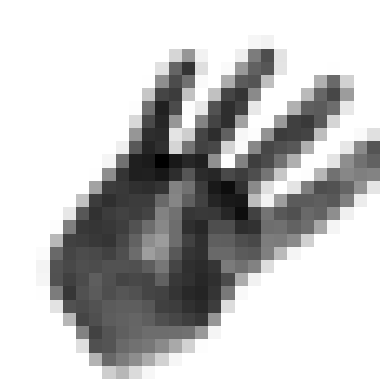

0

time: 118 ms (started: 2024-12-28 19:50:20 +00:00)


In [7]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)


This code defines a numerically stable sigmoid activation function and visualizes it using Matplotlib.

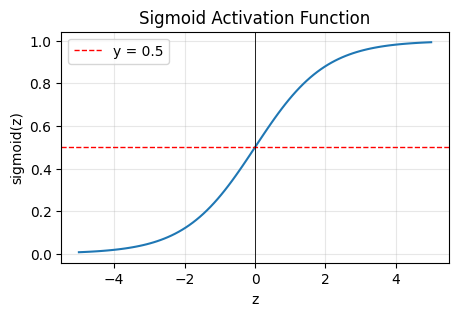

time: 203 ms (started: 2024-12-28 19:50:24 +00:00)


In [8]:
# Sigmoid activation function
def sigmoid(z):
    return np.where( # will work efficiently with arrays
        z<0,
        np.exp(z) / (1+np.exp(z)), # to prevent overflow with large negatives
        1 / (1+np.exp(-z))
    )

# plot the sigmoid function
z = np.linspace(-5, 5, 100)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(5, 3))
plt.plot(z, sigmoid_values)
plt.title("Sigmoid Activation Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label="y = 0.5")
plt.axvline(0, color='black', linestyle='-', linewidth=0.6)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


In [9]:
# Binary cross entropy
def log_loss(y_hat, y):
    epsilon = 1e-15
    if y_hat > 1-epsilon:
      y_hat = 1-epsilon
    elif y_hat < epsilon:
      y_hat = epsilon

    return - (y*np.log(y_hat) + (1-y)*np.log(1-y_hat))


time: 728 µs (started: 2024-12-28 19:50:28 +00:00)


## NN Hyper Parameters

In [10]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 10 # 10 neurons in the hidden layer
learning_rate = 0.1
epochs = 10

time: 609 µs (started: 2024-12-28 19:50:31 +00:00)


## Weight and Bias Initialization

In [11]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(10, 784)
(10, 1)
(1, 10)
(1, 1)
time: 1.68 ms (started: 2024-12-28 19:50:34 +00:00)


## Training (30%)

This code implements a simple neural network training loop with one hidden layer using gradient descent. For each epoch, it iterates over every training example, performs a forward pass to calculate predictions (A1 and A2), computes the loss (log_loss) for each sample, and then performs backpropagation to compute the gradients (dW1, db1, dW2, db2). After updating the weights and biases (W1, b1, W2, b2), it calculates the average loss across all examples in that epoch and prints it.

In [12]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X.shape[1] # 800 examples in training set

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(num_of_examples):

    # Forward propagation
    Z1 = np.matmul(W1,X[:,j]) + b1[:,0]
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2[:,0]
    A2 = sigmoid(Z2)
    Yout = Y[j,0]

    # Compute loss
    loss = log_loss(A2, Yout)
    avg_epoch_loss += loss

    # Back propagation
    dZ2 = (A2-Yout)
    dW2 = np.outer(dZ2, A1)
    db2 = dZ2

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = np.outer(dZ1, X[:, j])
    db1 = dZ1

    # Update weights
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/num_of_examples
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: [0.54995393]
Epoch 1  Loss: [0.23313804]
Epoch 2  Loss: [0.10348946]
Epoch 3  Loss: [0.05769929]
Epoch 4  Loss: [0.03375104]
Epoch 5  Loss: [0.01938011]
Epoch 6  Loss: [0.01288177]
Epoch 7  Loss: [0.00969038]
Epoch 8  Loss: [0.00776858]
Epoch 9  Loss: [0.00644571]
time: 688 ms (started: 2024-12-28 19:50:38 +00:00)


### Loss Visualization

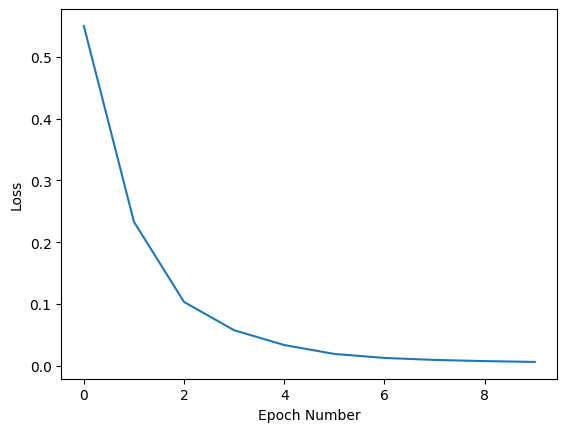

time: 176 ms (started: 2024-12-28 19:50:45 +00:00)


In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

This code takes the trained weights/biases from the neural network and uses them to make predictions on the test data. It applies the same forward pass steps (matrix multiplications plus sigmoid activation), then applies a threshold of 0.5 to decide whether each output is labeled as 0 or 1. Finally, it computes the confusion matrix and the overall accuracy by comparing these predictions to the true test labels.

In [14]:
# Forward batch of examples
X = X_test
Y = Y_test


Z1 = np.matmul(W1, X).T + b1[:,0]
A1 = sigmoid(Z1)
Z2 = np.matmul(W2,A1.T).T + b2[:,0]
A2 = sigmoid(Z2).T


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print("Confusion Matrix:\n")
print(confusion_matrix(predictions.T, labels.T))
print(f"\nAccuracy:{accuracy_score(predictions.T, labels.T)}")

Confusion Matrix:

[[ 91   0]
 [  0 109]]

Accuracy:1.0
time: 11.5 ms (started: 2024-12-28 19:50:50 +00:00)


### Visualize the results

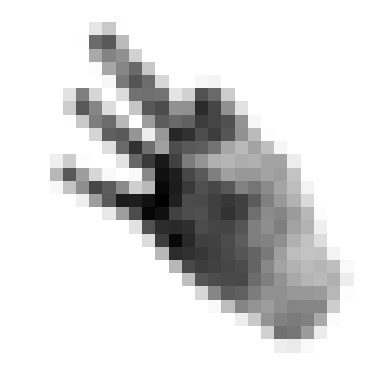

Real= 1 Predicted= [0.99923647]


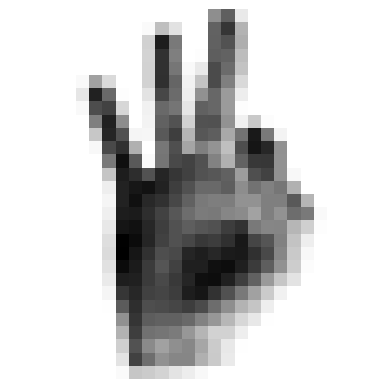

Real= 1 Predicted= [0.99920317]


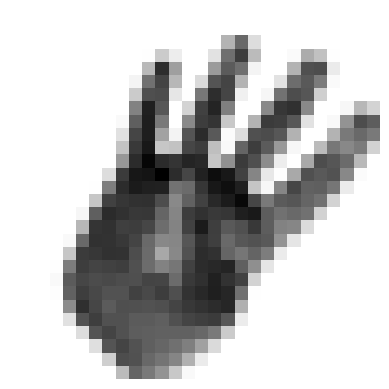

Real= 0 Predicted= [0.00835217]


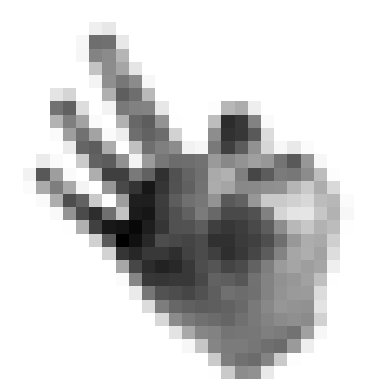

Real= 1 Predicted= [0.99955816]


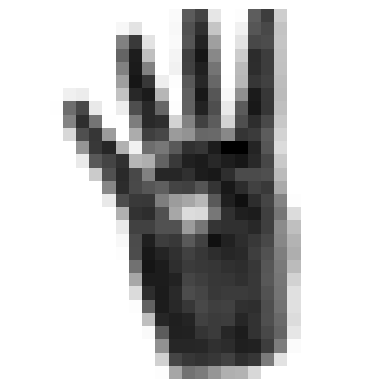

Real= 0 Predicted= [7.55751493e-05]


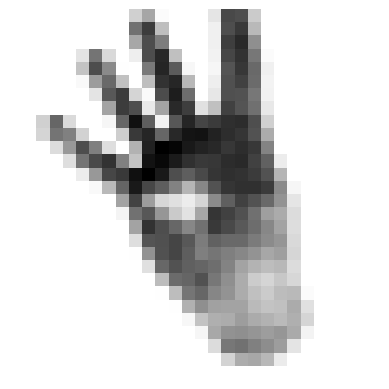

Real= 0 Predicted= [0.0044183]


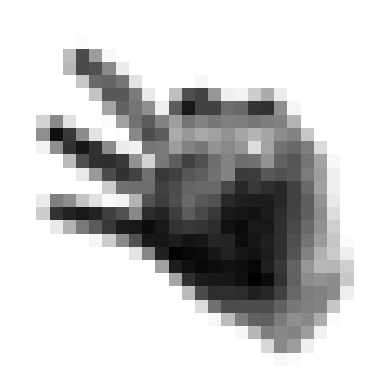

Real= 1 Predicted= [0.99827508]


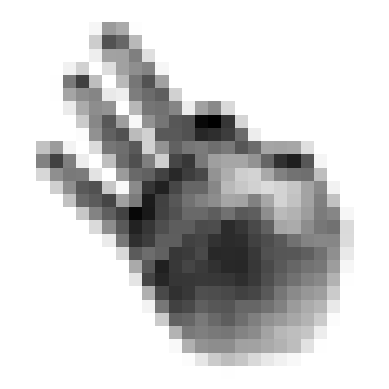

Real= 1 Predicted= [0.99954516]


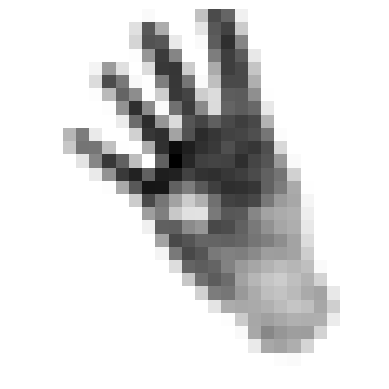

Real= 0 Predicted= [0.00251182]


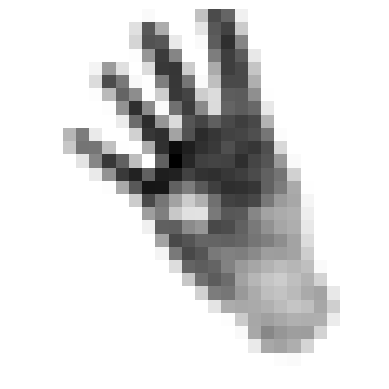

Real= 0 Predicted= [0.00251182]
time: 1.5 s (started: 2024-12-28 19:50:55 +00:00)


In [15]:
# SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  # Forward propagation
  Z1 = np.matmul(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2,A1)
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A2)